<h3>IRIS DATASET - CLASIFICATION</h3>

- Bibliotecas.
- Tema colores para plots.
- Sin líneas horizontales y fondo blanco.
- Tamaño de letra '14'.
- Leer archivo '.csv'.
- Mostrar dataframe.

In [78]:
import vapeplot
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [79]:
vapeplot.set_palette('macplus')
plt.rc('axes', grid = False, facecolor = "white")
plt.rcParams.update({'font.size': 14})

In [80]:
df_data = pd.read_csv("iris.csv")
df_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<h3>BOXPLOTS</h3>

- Boxplots para cada columna, comparado con la columna de respuestas 'variety'.

/home/miguel/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

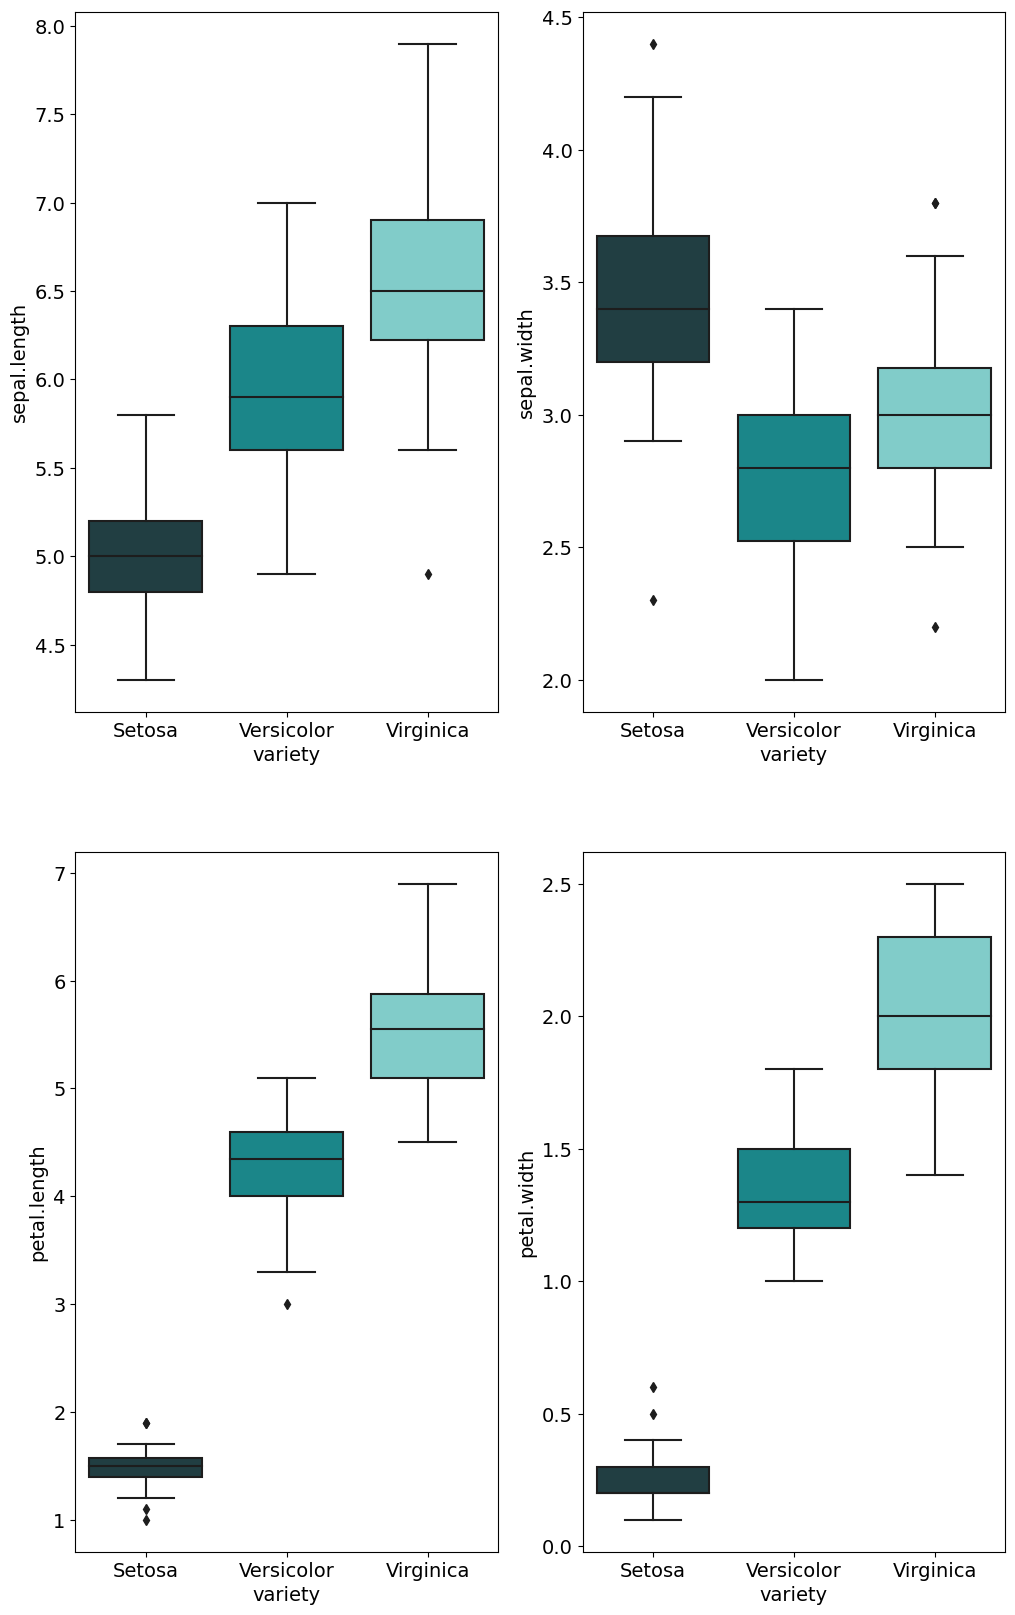

In [81]:
fig, axes = plt.subplots(2,2, figsize = (12, 20))

sns.boxplot(ax = axes[0][0], data =  df_data, x = "variety", y = "sepal.length", showfliers = True)
sns.boxplot(ax = axes[0][1], data =  df_data, x = "variety", y = "sepal.width", showfliers = True)
sns.boxplot(ax = axes[1][0], data =  df_data, x = "variety", y = "petal.length", showfliers = True)
sns.boxplot(ax = axes[1][1], data =  df_data, x = "variety", y = "petal.width", showfliers = True)

plt.savefig("box_plots/boxplots.png", dpi = 300)

<h3>HEATMAP</h3>

- Se aplica la correlación a las columnas numericas.
- Se crea un heatmap.

<Axes: >

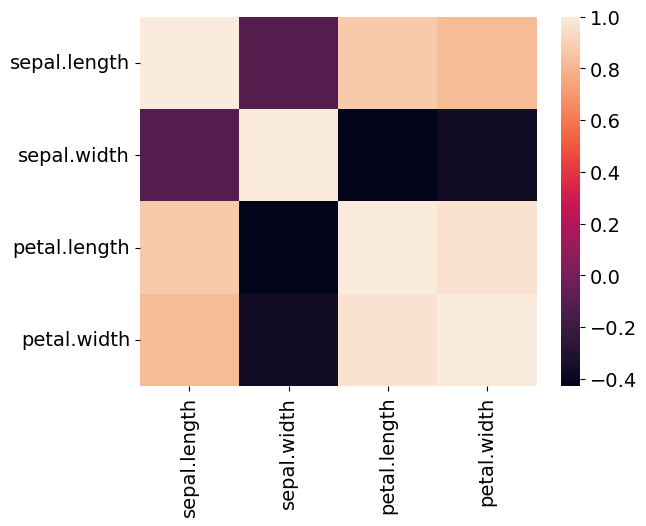

In [82]:
numerical_columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
categorical_columns = ['variety']

df_data_num = df_data[numerical_columns]
df_data_num_corr = df_data_num.corr()

sns.heatmap(data = df_data_num_corr)

<h3>TRAIN AND TEST</h3>

- Se separa el dataframe en respuesta (columna variedad) y valores (resto del dataframe sin columna respuesta).
- Se entrena con una separación de 70 y 30 (70 para entrenar y 30 para testear).

In [83]:
response = df_data['variety']
df_data_values = df_data.drop(columns = ['variety'])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_data_values, response, test_size = 0.40, random_state = 42)
X_train

,sepal.length,sepal.width,petal.length,petal.width
123,6.3,2.7,4.9,1.8
24,4.8,3.4,1.9,0.2
25,5.0,3.0,1.6,0.2
23,5.1,3.3,1.7,0.5
94,5.6,2.7,4.2,1.3
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [85]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)

<h4>GAUSSIAN NAIVE BAYES</h4>

In [86]:
gnb_model = GaussianNB()
gnb_model.fit(X = X_train, y = y_train)

GaussianNB()

In [87]:
x_test_scale = scaler.transform(X_test)
predictions_gnb = gnb_model.predict(X = X_test)

In [88]:
accuracy_score(y_pred = predictions_gnb, y_true = y_test)

0.9666666666666667

In [89]:
confusion_matrix(y_pred = predictions_gnb, y_true = y_test)

array([[23,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 17]])

<h4>KNEIGHBORS</h4>

In [90]:
knn_model = KNeighborsClassifier()
knn_model.fit(X = X_train, y = y_train)

KNeighborsClassifier()

In [91]:
x_test_scale = scaler.transform(X_test)
predictions_knn = knn_model.predict(X = X_test)

In [92]:
accuracy_score(y_pred = predictions_knn, y_true = y_test)

0.9833333333333333

In [93]:
confusion_matrix(y_pred = predictions_knn, y_true = y_test)

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]])

<h4>DECISION TREE</h4>

In [94]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X = X_train, y = y_train)

DecisionTreeClassifier()

In [95]:
x_test_scale = scaler.transform(X_test)
predictions_dt = dt_model.predict(X = X_test)

In [96]:
accuracy_score(y_pred = predictions_dt, y_true = y_test)

0.9666666666666667

In [97]:
confusion_matrix(y_pred = predictions_dt, y_true = y_test)

array([[23,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 17]])

<h4>RANDOM FOREST</h4>

In [98]:
rf_model = RandomForestClassifier()
rf_model.fit(X = X_train, y = y_train)

RandomForestClassifier()

In [99]:
x_test_scale = scaler.transform(X_test)
predictions_rf = rf_model.predict(X = X_test)

In [100]:
accuracy_score(y_pred = predictions_rf, y_true = y_test)

0.9833333333333333

In [101]:
confusion_matrix(y_pred = predictions_rf, y_true = y_test)

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]])